In [24]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('nifty50.csv')
df.head()

,Symbol,Open,High,Low,Last Traded Price,Change,%Change,Traded Volume(lacs),Traded Value(crs),52 Week High,52 Week Low,365 Days % Change,30 Days % Change,Yrows,Xcols
0,IBULHSGFIN,447,521,447,510,65.65,14.77,374.75,"1,829.16","1,380.90",425.5,-62.78,-25.77,1,1
1,EICHERMOT,"16,730.15","17,787.95","16,730.15","17,600.00",788.35,4.69,1.83,317.1,"29,800.00","15,786.00",-36.22,-7.56,1,2
2,TITAN,"1,050.00","1,077.00","1,041.50","1,077.00",35.90,3.45,29.45,311.55,"1,340.90",732.3,15.19,-2.00,1,3
3,MARUTI,"5,937.65","6,155.00","5,927.20","6,100.25",198.00,3.35,14.45,874.67,"9,468.30","5,446.05",-33.75,2.60,1,4
4,BAJAJFINSV,"7,355.00","7,590.00","7,325.00","7,494.00",203.55,2.79,4.16,311.27,"8,580.00","4,955.00",6.27,-4.60,1,5


In [26]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Last Traded Price', 'Change',
       '%Change', 'Traded Volume(lacs)', 'Traded Value(crs)', '52 Week High',
       '52 Week Low', '365 Days % Change', '30 Days % Change', 'Yrows',
       'Xcols'],
      dtype='object')

In [27]:
df.drop(['Open', 'High', 'Low', 'Last Traded Price', 'Change','Traded Volume(lacs)', 'Traded Value(crs)', '52 Week High','52 Week Low', '365 Days % Change', '30 Days % Change'],axis=1,inplace=True)

In [28]:
df.head()

,Symbol,%Change,Yrows,Xcols
0,IBULHSGFIN,14.77,1,1
1,EICHERMOT,4.69,1,2
2,TITAN,3.45,1,3
3,MARUTI,3.35,1,4
4,BAJAJFINSV,2.79,1,5


In [29]:
df.rename(columns={"%Change":"Change"},inplace=True)

In [30]:
df.head()

,Symbol,Change,Yrows,Xcols
0,IBULHSGFIN,14.77,1,1
1,EICHERMOT,4.69,1,2
2,TITAN,3.45,1,3
3,MARUTI,3.35,1,4
4,BAJAJFINSV,2.79,1,5


In [31]:
symbol=(np.asarray(df['Symbol'])).reshape(5,10)
perchange=(np.asarray(df['Change'])).reshape(5,10)


In [32]:
print(symbol)
print(perchange)

[['IBULHSGFIN' 'EICHERMOT' 'TITAN' 'MARUTI' 'BAJAJFINSV' 'HDFCBANK'
  'BAJFINANCE' 'VEDL' 'HINDUNILVR' 'KOTAKBANK']
 ['ICICIBANK' 'GAIL' 'HDFC' 'HEROMOTOCO' 'M&M' 'INFRATEL' 'GRASIM'
  'BRITANNIA' 'BPCL' 'RELIANCE']
 ['ULTRACEMCO' 'ASIANPAINT' 'ADANIPORTS' 'LT' 'IOC' 'INFY' 'INDUSINDBK'
  'AXISBANK' 'ONGC' 'UPL']
 ['BAJAJ-AUTO' 'DRREDDY' 'BHARTIARTL' 'HCLTECH' 'TCS' 'POWERGRID' 'WIPRO'
  'SBIN' 'SUNPHARMA' 'JSWSTEEL']
 ['NTPC' 'TATAMOTORS' 'ITC' 'ZEEL' 'TATASTEEL' 'COALINDIA' 'HINDALCO'
  'TECHM' 'CIPLA' 'YESBANK']]
[[14.77  4.69  3.45  3.35  2.79  2.32  2.16  2.02  1.94  1.93]
 [ 1.68  1.6   1.45  1.25  1.03  0.98  0.98  0.94  0.82  0.75]
 [ 0.64  0.64  0.55  0.29  0.19  0.16  0.07  0.   -0.11 -0.12]
 [-0.13 -0.23 -0.3  -0.47 -0.58 -0.64 -0.79 -0.85 -0.93 -0.99]
 [-1.04 -1.21 -1.34 -1.51 -1.62 -2.15 -2.24 -2.53 -3.57 -7.85]]


In [33]:
result=df.pivot(index='Yrows',columns='Xcols',values='Change')
print(result)                  

Xcols      1     2     3     4     5
Yrows                               
1      14.77  4.69  3.45  3.35  2.79
2       2.32  2.16  2.02  1.94  1.93
3       1.68  1.60  1.45  1.25  1.03
4       0.98  0.98  0.94  0.82  0.75
5       0.64  0.64  0.55  0.29  0.19
6       0.16  0.07  0.00 -0.11 -0.12
7      -0.13 -0.23 -0.30 -0.47 -0.58
8      -0.64 -0.79 -0.85 -0.93 -0.99
9      -1.04 -1.21 -1.34 -1.51 -1.62
10     -2.15 -2.24 -2.53 -3.57 -7.85


In [34]:
#create an array to annotate the heatmap
labels=(np.asarray(["{0} \n {1:2f}".format(symb,value)
                    for symb,value in zip(symbol.flatten(),
                    perchange.flatten())])).reshape(10,5)
labels


array([['IBULHSGFIN \n 14.770000', 'EICHERMOT \n 4.690000',
        'TITAN \n 3.450000', 'MARUTI \n 3.350000',
        'BAJAJFINSV \n 2.790000'],
       ['HDFCBANK \n 2.320000', 'BAJFINANCE \n 2.160000',
        'VEDL \n 2.020000', 'HINDUNILVR \n 1.940000',
        'KOTAKBANK \n 1.930000'],
       ['ICICIBANK \n 1.680000', 'GAIL \n 1.600000', 'HDFC \n 1.450000',
        'HEROMOTOCO \n 1.250000', 'M&M \n 1.030000'],
       ['INFRATEL \n 0.980000', 'GRASIM \n 0.980000',
        'BRITANNIA \n 0.940000', 'BPCL \n 0.820000',
        'RELIANCE \n 0.750000'],
       ['ULTRACEMCO \n 0.640000', 'ASIANPAINT \n 0.640000',
        'ADANIPORTS \n 0.550000', 'LT \n 0.290000', 'IOC \n 0.190000'],
       ['INFY \n 0.160000', 'INDUSINDBK \n 0.070000',
        'AXISBANK \n 0.000000', 'ONGC \n -0.110000', 'UPL \n -0.120000'],
       ['BAJAJ-AUTO \n -0.130000', 'DRREDDY \n -0.230000',
        'BHARTIARTL \n -0.300000', 'HCLTECH \n -0.470000',
        'TCS \n -0.580000'],
       ['POWERGRID \n -0.640000', 

In [35]:
#format command is used to pass the values 
print('hello {0}'.format('world'))

hello world


In [36]:
x=[1,2,3]
y=[6,7,8]
for i,j in zip(x,y):
    print(i,j)

1 6
2 7
3 8


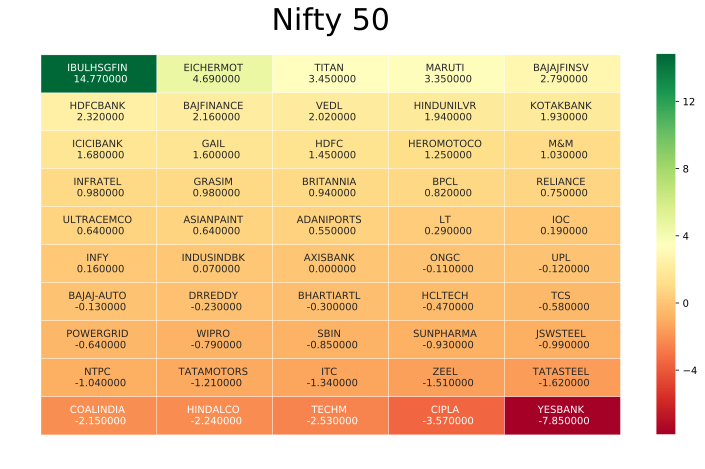

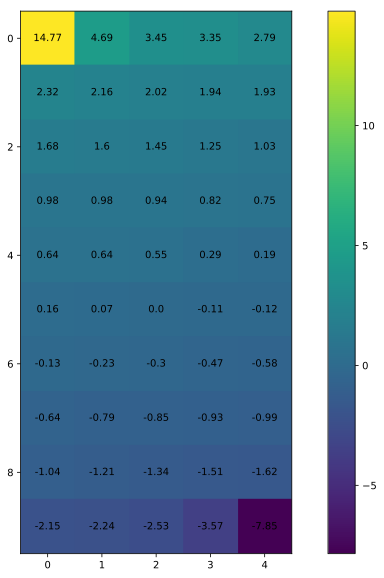

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

#define the piot
fig,ax=plt.subplots(figsize=(13,7))  #creating a grid

#add title  to the Heat map
title="Nifty 50"   # it is a variable 
 
#set the font size and the distance od the title from the plot
plt.title(title,fontsize=30) #variable is assigned to a title and giving font size
ttl=ax.title
ttl.set_position([0.5,1.05])

#hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])               #giving the data into rows & columns

#Remove the axes
ax.axis('off')
#Use the heatmap function from the seaborn  package
sn.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)    #

fig, ax = plt.subplots(figsize=(13,10))

im=ax.imshow(result)

fig.colorbar(im)
for (j,i), x in np.ndenumerate(result):
   url = "https://www.google.co.in".format(x)
   ax.annotate(x, xy=(i,j), ha="center", va="center",
                url=url, bbox=dict(color='r', alpha=1e-6, url=url))
#Display the Nifty 50

plt.show()

In [38]:
#These are libraries which we have imported
